# K-Nearest Neighbors implementation from scratch

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import style 
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 8)

In [80]:
# dataset 
dataset = {'k': [[1,2], [2,3], [3,1]], 'r': [[6,5], [7,7], [8,6]]}
# testset 
new_data = [5,7]

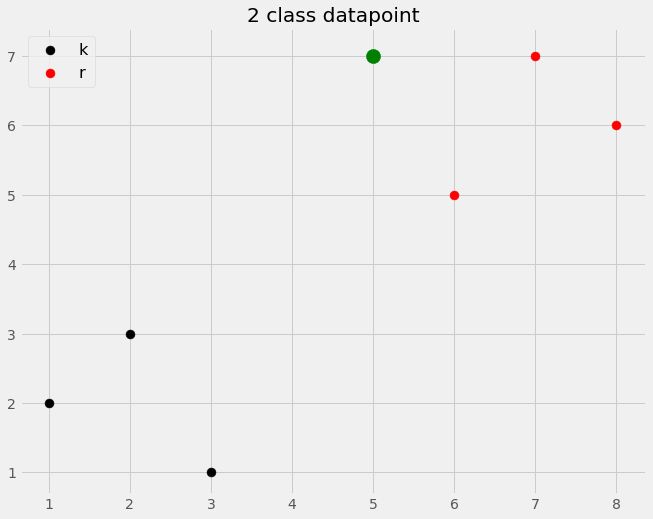

In [86]:
# plotting dataset and testset 
fig, ax = plt.subplots()
for i in dataset:
    data = np.array(dataset[i])
    ax.scatter(data[:,0], data[:,1], s=80, color=i, label=i)
    
ax.scatter(new_data[0], new_data[1], s=200, color='g', marker='o')
ax.legend(loc='upper left', fontsize=16)
plt.title("2 class datapoint")
plt.show()


In [84]:
# Define function computing the Euclidean distance between the unseen point to all datapoints 
def k_nearest_neighbors(data, predict, k=3):
    # store all computed distance
    distances = []
    
    for group in data:
        for row in data[group]:
            euclidean_dist = np.linalg.norm(np.array(row) - np.array(predict))
            distances.append([euclidean_dist, group])
            
    # Get the k-th most closest point from the sorted increasing distances 
    votes = [groups[1] for groups in sorted(distances)[:k]]

    # Get the first common vote within the votes list
    res = Counter(votes).most_common(1)[0][0]
    
    return res

In [85]:
# Predict testset 
res = k_nearest_neighbors(dataset, new_data)
print("{} belongs to {}".format(new_data, res))

[5, 7] belongs to r
